<a href="https://colab.research.google.com/github/Nodi-W/DS-ML/blob/main/finaldsml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries import karte hain
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#File ko load karo
  # Apne file ka path dala
df=pd.read_excel('/content/drive/MyDrive/DS ml/digital_wellbeing_50000.xlsx')
df

,Username,Daily_ScreenTime_min,Daily_Unlocks,Night_Usage_min,Most_Used_App,Notifications_Received,Avg_Session_Duration_min,Age,City
0,Aarav,510,136,96,Evernote,259,9.173079,40,Chennai
1,Vivaan,358,130,114,PUBG,207,7.297349,41,Delhi
2,Aditya,163,113,114,Clash of Clans,285,6.090389,47,Kolkata
3,Vihaan,355,139,116,Trello,236,6.219628,28,Mumbai
4,Arjun,219,104,106,Trello,291,7.014146,45,Chennai
...,...,...,...,...,...,...,...,...,...
49995,Sneha,225,105,111,Evernote,228,7.115148,35,Mumbai
49996,Kiran,366,108,80,YouTube,215,7.903182,47,Bangalore
49997,Amit,595,113,99,PUBG,216,5.427384,36,Kolkata
49998,Vikas,391,126,90,Clash of Clans,219,5.067901,27,Kolkata


In [ ]:
# We are adding new columnn to display the usage whether it is overusage or not
# considering a healthy use less than 180 min or night usage less than 110 mins
#Condition yeh hai: jinka Daily_ScreenTime > 180 min aur Night_Usage > 110 min hai unhe overuse (1) maanenge
df['Overuse'] = ((df['Daily_ScreenTime_min'] > 240) & (df['Night_Usage_min'] > 100)).astype(int)
#naya column add kara h health k kya status h ye dikhane k lie good ya at risk
df['Health_Status'] = df['Overuse'].apply(lambda x: 'Good' if x == 0 else 'At Risk')
print(df['Overuse'].value_counts())
df

Overuse
0    31893
1    18107
Name: count, dtype: int64


,Username,Daily_ScreenTime_min,Daily_Unlocks,Night_Usage_min,Most_Used_App,Notifications_Received,Avg_Session_Duration_min,Age,City,Overuse,Health_Status
0,Aarav,510,136,96,Evernote,259,9.173079,40,Chennai,0,Good
1,Vivaan,358,130,114,PUBG,207,7.297349,41,Delhi,1,At Risk
2,Aditya,163,113,114,Clash of Clans,285,6.090389,47,Kolkata,0,Good
3,Vihaan,355,139,116,Trello,236,6.219628,28,Mumbai,1,At Risk
4,Arjun,219,104,106,Trello,291,7.014146,45,Chennai,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
49995,Sneha,225,105,111,Evernote,228,7.115148,35,Mumbai,0,Good
49996,Kiran,366,108,80,YouTube,215,7.903182,47,Bangalore,0,Good
49997,Amit,595,113,99,PUBG,216,5.427384,36,Kolkata,0,Good
49998,Vikas,391,126,90,Clash of Clans,219,5.067901,27,Kolkata,0,Good


In [ ]:
#1st operation:Using y as Target variable and x as independent variable and then helping the user to analyze the
#usage and behaviour
# Step3:Features aur target
X = df[['Daily_Unlocks', 'Night_Usage_min', 'Notifications_Received',
        'Avg_Session_Duration_min', 'Age']]
y = df['Overuse']
#Step4:Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Logistic Regression :")
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression :
Confusion Matrix:
 [[5567  779]
 [ 888 2766]]
Accuracy: 0.8333
Precision: 0.7802538787023977
Recall: 0.7569786535303776
F1 Score: 0.7684400611196


In [ ]:
print("Linear Regression :")
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = (lin_model.predict(X_test) >= 0.5).astype(int)  # 0.5 se zyada ko 1 maana

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lin))
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Precision:", precision_score(y_test, y_pred_lin))
print("Recall:", recall_score(y_test, y_pred_lin))
print("F1 Score:", f1_score(y_test, y_pred_lin))

Linear Regression :
Confusion Matrix:
 [[5524  822]
 [ 725 2929]]
Accuracy: 0.8453
Precision: 0.7808584377499334
Recall: 0.8015873015873016
F1 Score: 0.7910871033085752


In [ ]:
print("Decision Tree :")
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree :
Confusion Matrix:
 [[6312   34]
 [  41 3613]]
Accuracy: 0.9925
Precision: 0.9906772689882095
Recall: 0.9887794198139026
F1 Score: 0.9897274345980003


In [ ]:
#Random Forest
print("Random Forest :")
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Precision:", precision_score(y_test, y_pred_forest))
print("Recall:", recall_score(y_test, y_pred_forest))
print("F1 Score:", f1_score(y_test, y_pred_forest))

Random Forest :
Confusion Matrix:
 [[6327   19]
 [  24 3630]]
Accuracy: 0.9957
Precision: 0.9947930939983557
Recall: 0.993431855500821
F1 Score: 0.9941120087635218


In [ ]:
#most efficient method
# Direct DataFrame banate hain ek hi step me
df_scores = pd.DataFrame([
    ['Logistic Regression', accuracy_score(y_test, y_pred_log), precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
    ['Linear Regression', accuracy_score(y_test, y_pred_lin), precision_score(y_test, y_pred_lin), recall_score(y_test, y_pred_lin), f1_score(y_test, y_pred_lin)],
    ['Decision Tree', accuracy_score(y_test, y_pred_tree), precision_score(y_test, y_pred_tree), recall_score(y_test, y_pred_tree), f1_score(y_test, y_pred_tree)],
    ['Random Forest', accuracy_score(y_test, y_pred_forest), precision_score(y_test, y_pred_forest), recall_score(y_test, y_pred_forest), f1_score(y_test, y_pred_forest)]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Print values to 1
print(df_scores)
#iske liye Decision Tree aur Random Forest better rahe.
#Linear Regression ki accuracy theek thi lekin recall low tha, isliye yeh is use-case ke liye best nahi hai

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression    0.8333   0.780254  0.756979  0.768440
1    Linear Regression    0.8453   0.780858  0.801587  0.791087
2        Decision Tree    0.9925   0.990677  0.988779  0.989727
3        Random Forest    0.9957   0.994793  0.993432  0.994112


[[5567  779]
 [ 888 2766]]


Text(0.5, 1.0, 'Confusion Matrix')

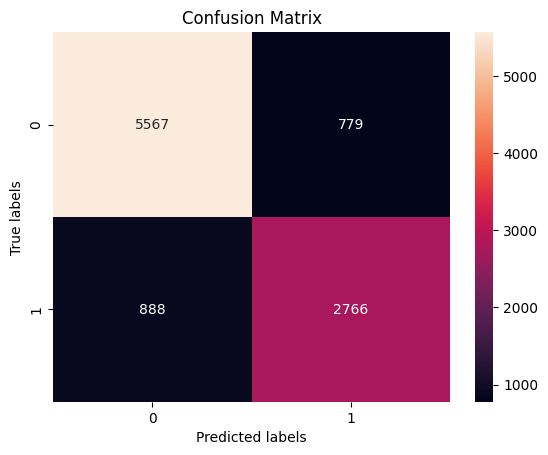

In [ ]:
import seaborn as sns

train_cm = confusion_matrix(y_test, y_pred_log)
print(train_cm)
ax = plt.subplot()
sns.heatmap(train_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

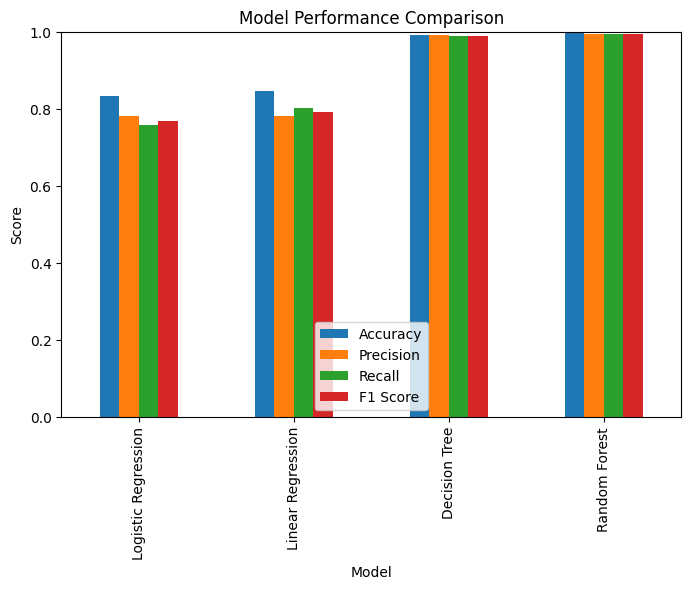

In [ ]:
df_scores.set_index('Model').plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

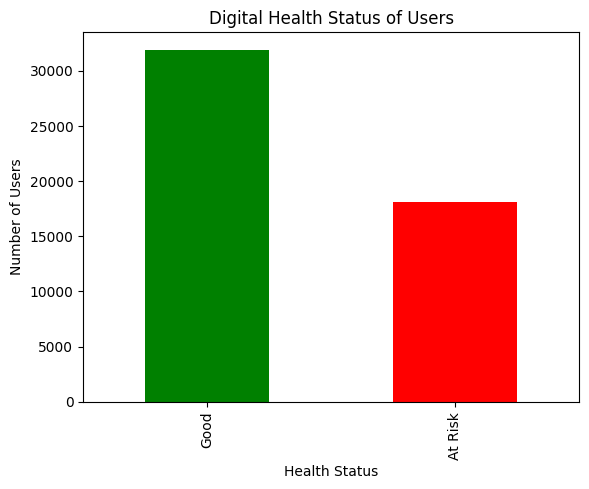

In [ ]:
df['Health_Status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Digital Health Status of Users")
plt.ylabel("Number of Users")
plt.xlabel("Health Status")
plt.show()

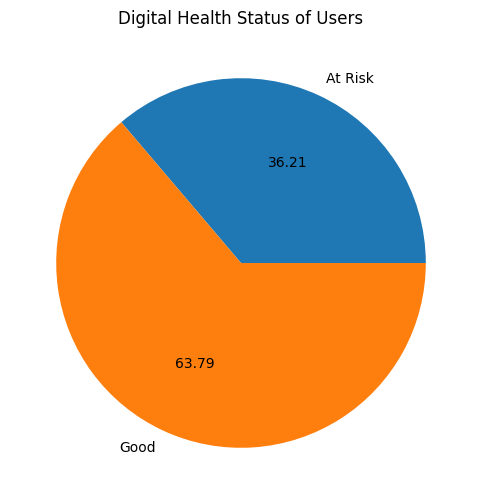

In [ ]:
#pie chart
healthstats=df.groupby("Health_Status")['Health_Status'].count().plot.pie(fontsize=10, autopct='%.2f', figsize=(6,6))
plt.title("Digital Health Status of Users")
plt.ylabel("")
plt.show()

Text(0.5, 0, 'City')

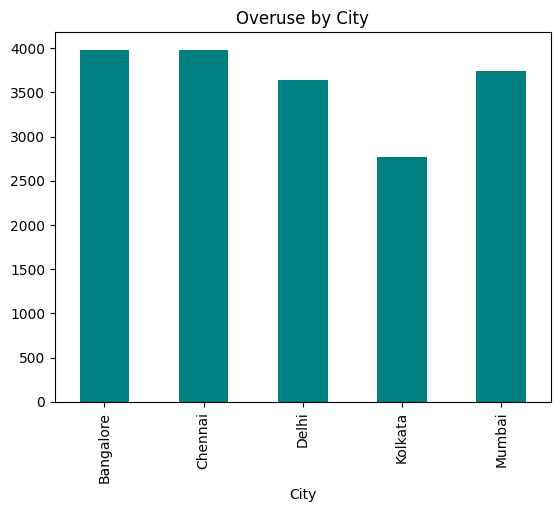

In [ ]:
#overuse by each city
overusage_by_city = df.groupby('City')['Overuse'].sum()
overusage_by_city.plot(kind='bar', color='teal')
plt.title("Overuse by City")
plt.xlabel("City")

Text(0.5, 1.0, 'Most Popular Apps Among Users')

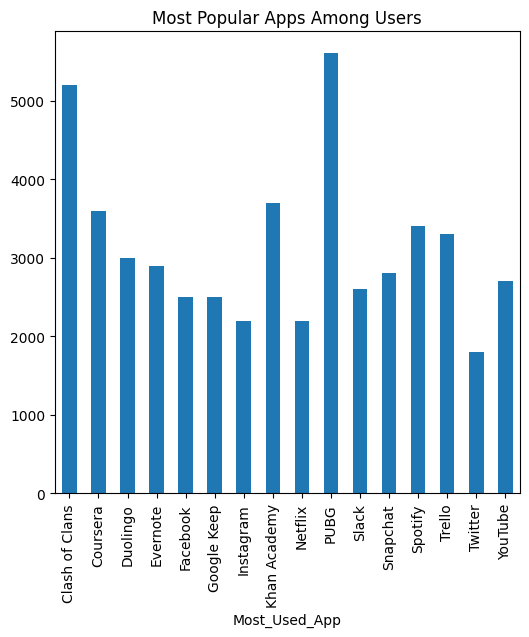

In [ ]:
#MOST POPULAR APPS AMONG USERS WITH HIGH MOBILE USAGE
popularapps=df.groupby("Most_Used_App")['Most_Used_App'].count().plot.bar(fontsize=10, figsize=(6,6))
plt.title("Most Popular Apps Among Users")

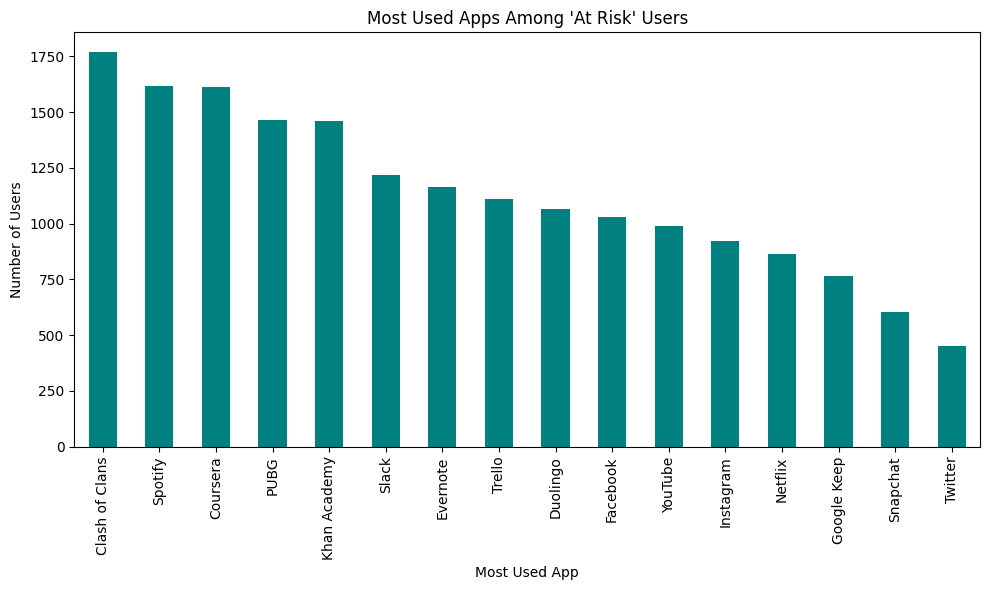

In [ ]:
# Analyze Most_Used_App for 'At Risk' users
at_risk_users = df[df['Health_Status'] == 'At Risk']
app_counts = at_risk_users['Most_Used_App'].value_counts()

plt.figure(figsize=(10, 6))
app_counts.plot(kind='bar', color='teal')
plt.title("Most Used Apps Among 'At Risk' Users")
plt.xlabel("Most Used App")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

In [ ]:
# City with sabse zyada overuse
city_overuse = df[df['Overuse'] == 1]['City'].value_counts().idxmax()
print(f" City with most overuse: {city_overuse}")

# City wise overuse count bhi dikhana ho to:
city_overuse_count = df[df['Overuse'] == 1]['City'].value_counts()
print("\nCity-wise overuse count:")
print(city_overuse_count)

# Most used app
most_used_app = df['Most_Used_App'].value_counts().idxmax()
print(f"\n Most used app overall: {most_used_app}")

# Most used app ke counts bhi dikhana ho to:
app_counts = df['Most_Used_App'].value_counts()
print("\nApp usage frequency:")
print(app_counts)



 City with most overuse: Bangalore

City-wise overuse count:
City
Bangalore    3980
Chennai      3978
Mumbai       3745
Delhi        3636
Kolkata      2768
Name: count, dtype: int64

 Most used app overall: PUBG

App usage frequency:
Most_Used_App
PUBG              5600
Clash of Clans    5200
Khan Academy      3700
Coursera          3600
Spotify           3400
Trello            3300
Duolingo          3000
Evernote          2900
Snapchat          2800
YouTube           2700
Slack             2600
Facebook          2500
Google Keep       2500
Netflix           2200
Instagram         2200
Twitter           1800
Name: count, dtype: int64


In [ ]:
df

,Username,Daily_ScreenTime_min,Daily_Unlocks,Night_Usage_min,Most_Used_App,Notifications_Received,Avg_Session_Duration_min,Age,City,Overuse,Health_Status
0,Aarav,510,136,96,Evernote,259,9.173079,40,Chennai,0,Good
1,Vivaan,358,130,114,PUBG,207,7.297349,41,Delhi,1,At Risk
2,Aditya,163,113,114,Clash of Clans,285,6.090389,47,Kolkata,0,Good
3,Vihaan,355,139,116,Trello,236,6.219628,28,Mumbai,1,At Risk
4,Arjun,219,104,106,Trello,291,7.014146,45,Chennai,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
49995,Sneha,225,105,111,Evernote,228,7.115148,35,Mumbai,0,Good
49996,Kiran,366,108,80,YouTube,215,7.903182,47,Bangalore,0,Good
49997,Amit,595,113,99,PUBG,216,5.427384,36,Kolkata,0,Good
49998,Vikas,391,126,90,Clash of Clans,219,5.067901,27,Kolkata,0,Good


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# DATA ANALYSIS
print("DO YOU WANT TO ANALYSE THE DATA OF A PARTICULAR CITY")
c1=input("YES OR NO (CASE SENSITIVE)  ")
if c1=="YES":
  print("OK LETS EXPLORE THE DATA OF PARTICULAR CITY")
  print(" TYPE Delhi \n TYPE Mumbai \n TYPE Chennai \n TYPE Bangalore \n TYPE Kolkata")
  city=input('ENTER THE CITY NAME  ')
  if city=='Delhi':
    filtered_df = df[df['City']==city]
    print(filtered_df)
    print("What do you wanna see in Delhi")
    print(" MOST USED APP \n POPULAR APP AMONG USERS AT RISK \n NUMBER OF HEALTHY USERS \n NUMBER OF USERS AT RISK \n CHOOSE FROM ABOVE")
    c3=input("ENTER YOUR CHOICE  ")
    if c3=='MOST USED APP':
      most_used_app = filtered_df['Most_Used_App'].value_counts().idxmax()
      print(f"\n Most used app overall: {most_used_app}")
    elif c3=='POPULAR APP AMONG USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      app_counts = at_risk_users['Most_Used_App'].value_counts()
      print(app_counts)
    elif c3=='NUMBER OF HEALTHY USERS':
      healthy_users = filtered_df[filtered_df['Health_Status'] == 'Good']
      print(f"\nNumber of healthy users: {len(healthy_users)}")
    elif c3=='NUMBER OF USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      print(f"\nNumber of users at risk: {len(at_risk_users)}")


  elif city=='Mumbai':
    filtered_df = df[df['City']==city]
    print(filtered_df)
    print("What do you wanna see in Mumbai")
    print(" MOST USED APP \n POPULAR APP AMONG USERS AT RISK \n NUMBER OF HEALTHY USERS \n NUMBER OF USERS AT RISK \n CHOOSE FROM ABOVE")
    c3=input("ENTER YOUR CHOICE  ")
    if c3=='MOST USED APP':
      most_used_app = filtered_df['Most_Used_App'].value_counts().idxmax()
      print(f"\n Most used app overall: {most_used_app}")
    elif c3=='POPULAR APP AMONG USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      app_counts = at_risk_users['Most_Used_App'].value_counts()
      print(app_counts)
    elif c3=='NUMBER OF HEALTHY USERS':
      healthy_users = filtered_df[filtered_df['Health_Status'] == 'Good']
      print(f"\nNumber of healthy users: {len(healthy_users)}")
    elif c4=='NUMBER OF USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      print(f"\nNumber of users at risk: {len(at_risk_users)}")


  elif city=='Chennai':
    filtered_df = df[df['City']==city]
    print(filtered_df)
    print("What do you wanna see in Chennai")
    print(" MOST USED APP \n POPULAR APP AMONG USERS AT RISK \n NUMBER OF HEALTHY USERS \n NUMBER OF USERS AT RISK \n CHOOSE FROM ABOVE")
    c3=input("ENTER YOUR CHOICE  ")
    if c3=='MOST USED APP':
      most_used_app = filtered_df['Most_Used_App'].value_counts().idxmax()
      print(f"\n Most used app overall: {most_used_app}")
    elif c3=='POPULAR APP AMONG USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      app_counts = at_risk_users['Most_Used_App'].value_counts()
      print(app_counts)
    elif c3=='NUMBER OF HEALTHY USERS':
      healthy_users = filtered_df[filtered_df['Health_Status'] == 'Good']
      print(f"\nNumber of healthy users: {len(healthy_users)}")
    elif c4=='NUMBER OF USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      print(f"\nNumber of users at risk: {len(at_risk_users)}")


  elif city=='Bangalore':
    filtered_df = df[df['City']==city]
    print(filtered_df)
    print("What do you wanna see in Bangalore")
    print(" MOST USED APP \n POPULAR APP AMONG USERS AT RISK \n NUMBER OF HEALTHY USERS \n NUMBER OF USERS AT RISK \n CHOOSE FROM ABOVE")
    c3=input("ENTER YOUR CHOICE  ")
    if c3=='MOST USED APP':
      most_used_app = filtered_df['Most_Used_App'].value_counts().idxmax()
      print(f"\n Most used app overall: {most_used_app}")
    elif c3=='POPULAR APP AMONG USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      app_counts = at_risk_users['Most_Used_App'].value_counts()
      print(app_counts)
    elif c3=='NUMBER OF HEALTHY USERS':
      healthy_users = filtered_df[filtered_df['Health_Status'] == 'Good']
      print(f"\nNumber of healthy users: {len(healthy_users)}")
    elif c4=='NUMBER OF USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      print(f"\nNumber of users at risk: {len(at_risk_users)}")



  elif city=='Kolkata':
    filtered_df = df[df['City']==city]
    print(filtered_df)
    print("What do you wanna see in Kolkata")
    print(" MOST USED APP \n POPULAR APP AMONG USERS AT RISK \n NUMBER OF HEALTHY USERS \n NUMBER OF USERS AT RISK \n CHOOSE FROM ABOVE")
    c3=input("ENTER YOUR CHOICE  ")
    if c3=='MOST USED APP':
      most_used_app = filtered_df['Most_Used_App'].value_counts().idxmax()
      print(f"\n Most used app overall: {most_used_app}")
    elif c3=='POPULAR APP AMONG USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      app_counts = at_risk_users['Most_Used_App'].value_counts()
      print(app_counts)
    elif c3=='NUMBER OF HEALTHY USERS':
      healthy_users = filtered_df[filtered_df['Health_Status'] == 'Good']
      print(f"\nNumber of healthy users: {len(healthy_users)}")
    elif c4=='NUMBER OF USERS AT RISK':
      at_risk_users = filtered_df[filtered_df['Health_Status'] == 'At Risk']
      print(f"\nNumber of users at risk: {len(at_risk_users)}")




elif c1=='NO':
  print("OK, Thank You for your time")
else:
  print('Sorry but there is some error in the input please check')


print("SEND A POPUP TO USERS AT RISK?")
print("YES OR NO")
c4=input("ENTER CHOICE")
if c4=='YES':
  print("OK LETS SEND A POPUP") #IF USER IS OVERUSING DISPLAY OR SEND A POP UP SAYING (YOUR HEALTH IS AT RISK)
  df_risky=df[df['Health_Status']=='At Risk']
  print(df_risky)
  print("YOU ARE OVERUSING YOUR DEVICE, YOUR HEALTH IS AT RISK, PLEASE MAINTAIN YOUR SCREEN TIME")
elif c4=='NO':
  print("OK, Thank You for your time")
else:
  print('Sorry but there is some error in the input please check')




DO YOU WANT TO ANALYSE THE DATA OF A PARTICULAR CITY
YES OR NO (CASE SENSITIVE)  YES
OK LETS EXPLORE THE DATA OF PARTICULAR CITY
 TYPE Delhi 
 TYPE Mumbai 
 TYPE Chennai 
 TYPE Bangalore 
 TYPE Kolkata
ENTER THE CITY NAME  Kolkata
      Username  Daily_ScreenTime_min  Daily_Unlocks  Night_Usage_min  \
2       Aditya                   163            113              114   
8      Krishna                   354            120               85   
28       Arnav                   419            123              118   
30       Tanvi                   585            127              114   
38       Meera                   350            136              110   
...        ...                   ...            ...              ...   
49976    Rudra                   557            112               86   
49978    Arnav                   191            102               88   
49987     Anvi                   428            129              109   
49997     Amit                   595            1